In [1]:
import px4tools
import pandas
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = (15,5)
pl.rcParams['lines.linewidth'] = 3

In [2]:
data = px4tools.project_lat_lon(px4tools.process_data(pandas.read_csv('logs/15-10-24-16_46_42-jgoppert.csv')))

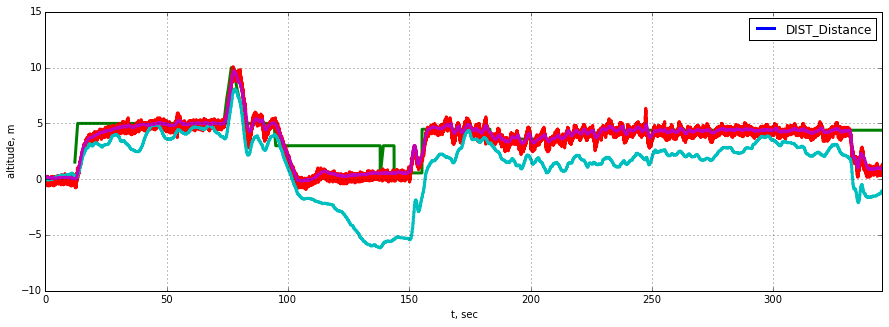

In [3]:
px4tools.alt_analysis(data);

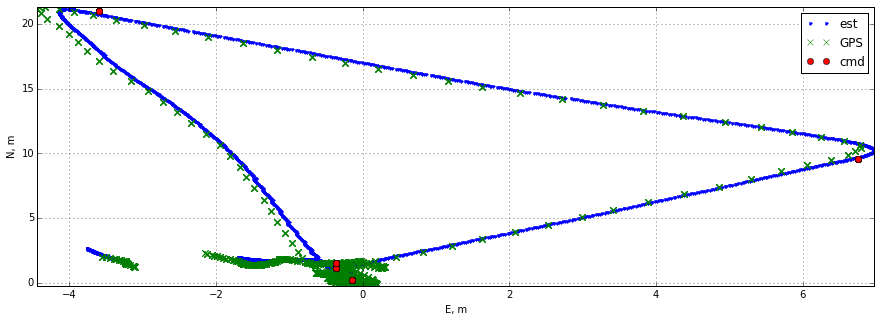

In [4]:
px4tools.pos_analysis(data[data.STAT_MainState == 3]);

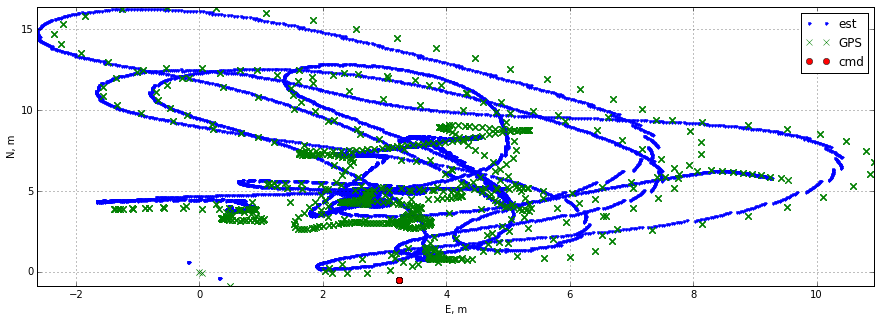

In [5]:
px4tools.pos_analysis(data[data.STAT_MainState == 2]);

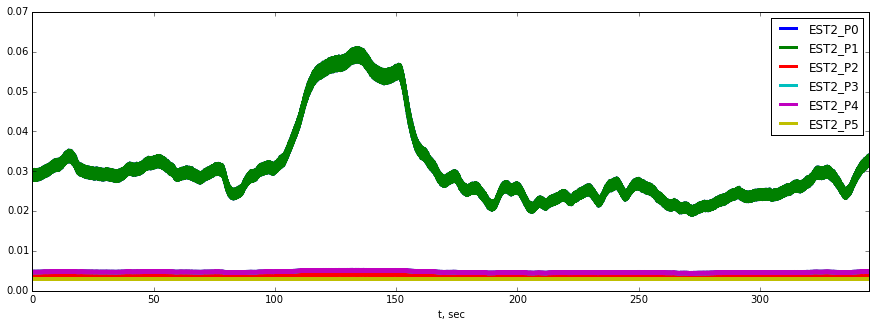

In [6]:
data.EST2_P0.plot()
data.EST2_P1.plot()
data.EST2_P2.plot()
data.EST2_P3.plot()
data.EST2_P4.plot()
data.EST2_P5.plot()
pl.legend()

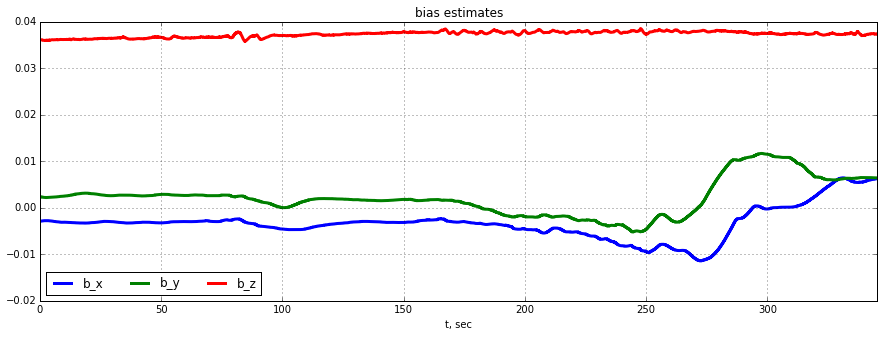

In [7]:
data1 = data
data1.EST0_s6.plot(label='b_x')
data1.EST0_s7.plot(label='b_y')
data1.EST0_s8.plot(label='b_z')
pl.legend(loc='best', ncol=3)
pl.title('bias estimates')
pl.grid()

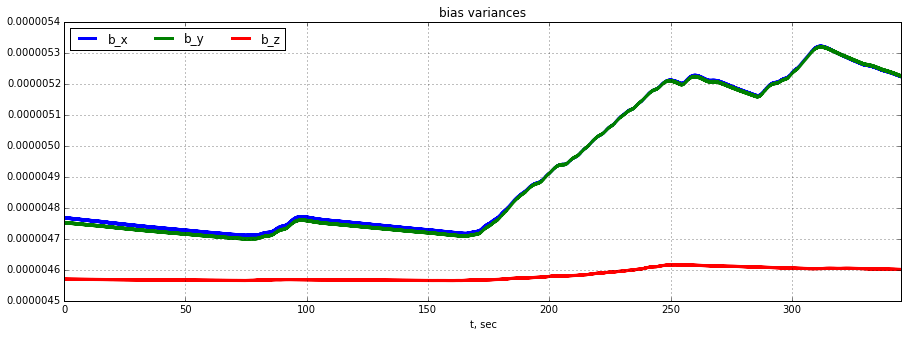

In [8]:
data1.EST2_P6.plot(label='b_x')
data1.EST2_P7.plot(label='b_y')
data1.EST2_P8.plot(label='b_z')
pl.grid()
pl.title('bias variances')
pl.legend(loc='best', ncol=3)

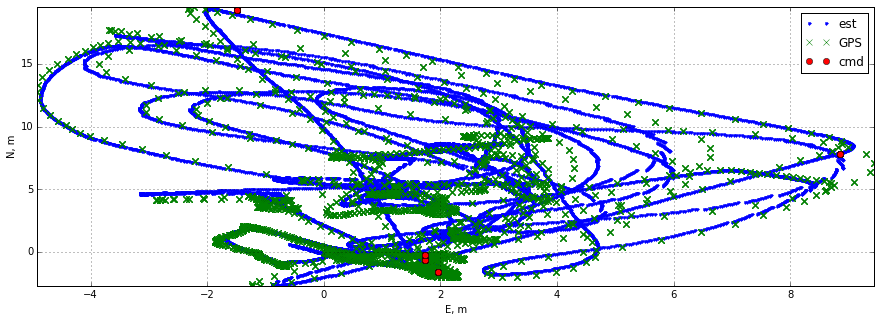

In [9]:
px4tools.pos_analysis(data);

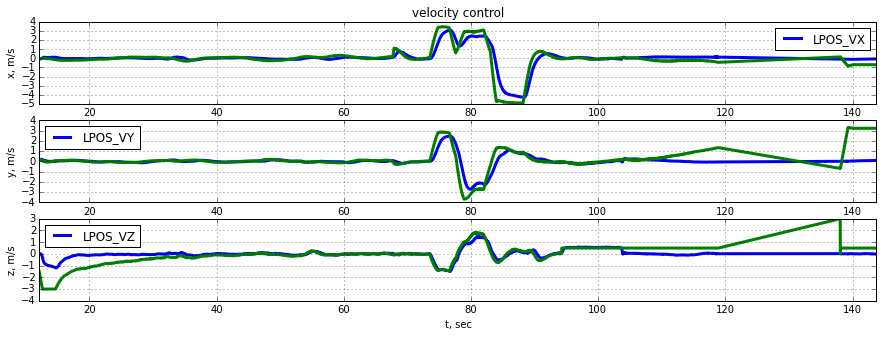

In [10]:
px4tools.plot_velocity_loops(data[data.STAT_MainState==3])

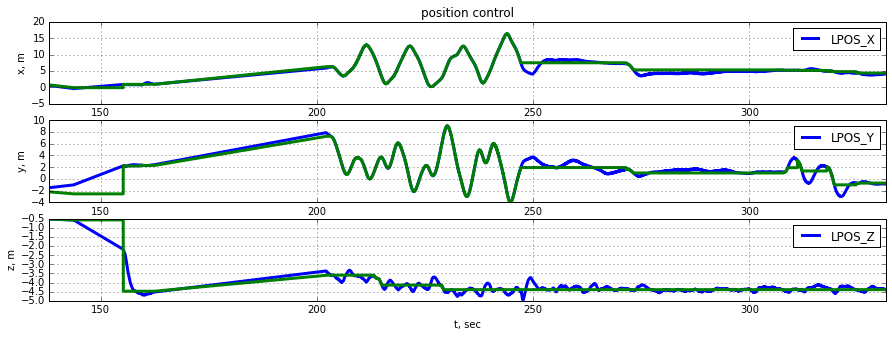

In [11]:
px4tools.plot_position_loops(data[data.STAT_MainState==2])

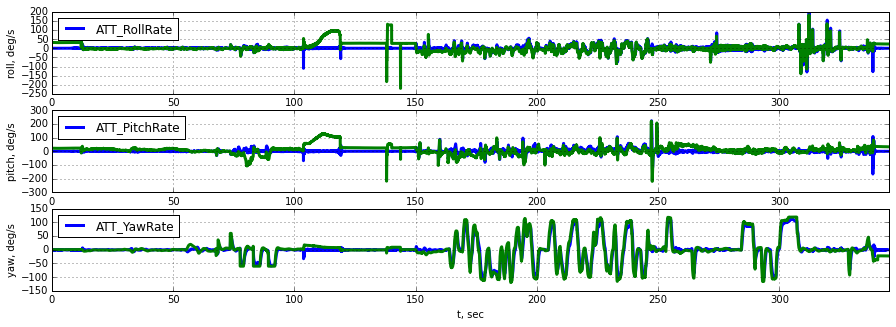

In [12]:
px4tools.plot_attitude_rate_loops(data)

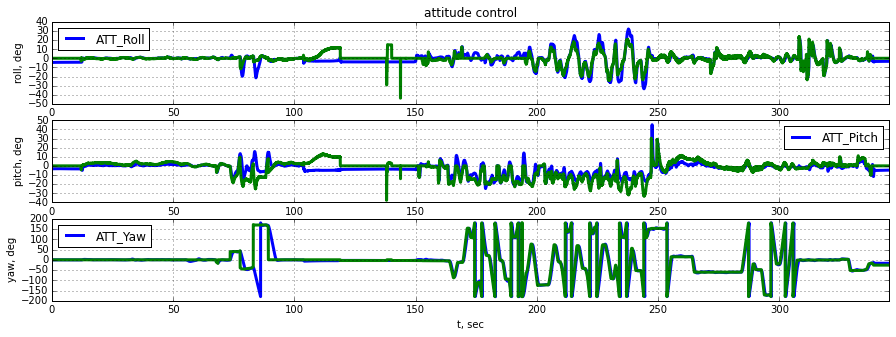

In [13]:
px4tools.plot_attitude_loops(data)

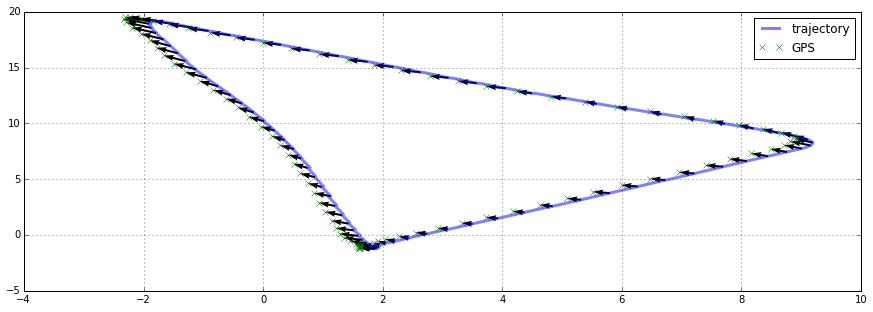

In [120]:
data1 = data[74:92]
#pl.quiver()
gps_x = px4tools.new_sample(data1.GPS_X)
gps_y = px4tools.new_sample(data1.GPS_Y)
p_x = px4tools.new_sample(data1.LPOS_X)
p_y = px4tools.new_sample(data1.LPOS_Y)
pl.plot(p_y, p_x, label='trajectory', alpha=0.5)
pl.plot(gps_y, gps_x, 'x', label='GPS')
pl.quiver(p_y, p_x, gps_y - p_y, gps_x - p_x, scale_units='xy', scale=1, units='xy', angles='xy', label='$\Delta$')
pl.legend()

pl.grid()
#pl.legend(loc='best')

In [176]:
data1 = []
f_gps_delay = lambda dt, t1, t2, data: pl.norm(data.GPS_X[t1:t2] - data.LPOS_X[t1-dt: t2-dt])
f_gps_delay(0, 70, 80, data)

5.5964032858493233

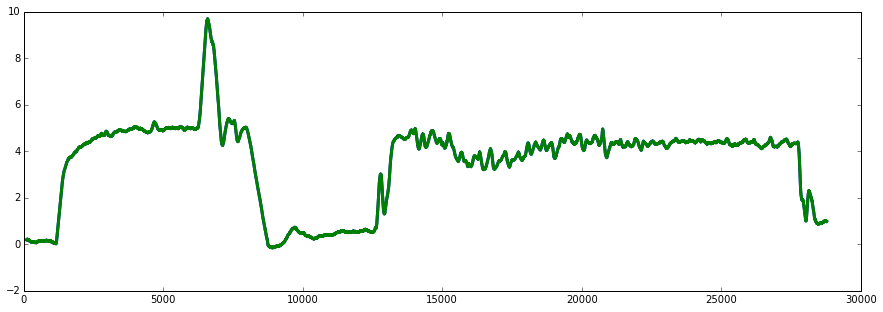

In [180]:
pl.plot(data.LPOS_Dist.shift(100));
pl.plot(data.LPOS_Dist.shift(100));

In [250]:
def f_delay(series1, series2, dt):
    d = series2.shift(dt)
    pl.interp(pl.array(series1.index, dtype=float), pl.array(series1.index, dtype=float) + 0.1,
          pl.array(series1, dtype=float))
    dx = series1.shift(dt) - series2.shift(0)
    dx_data = pl.array(dx[pl.isfinite(dx)])
    return pl.norm(dx_data)

In [265]:
pl.interp(pl.array(data.index, dtype=float), pl.array(data.index, dtype=float) + 0.1,
          pl.array(data.LPOS_X, dtype=float))

array([ 0.40515664,  0.40515664,  0.40515664, ..., -1.58825561,
       -1.58723911, -1.58629803])

In [264]:
f_delay(data.LPOS_X, data.GPS_X, 1)

69.849252601518259

In [252]:
import scipy.optimize

In [255]:
scipy.optimize.fmin(lambda dt: f_delay(data.LPOS_X, data.GPS_X, dt), 0);

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9


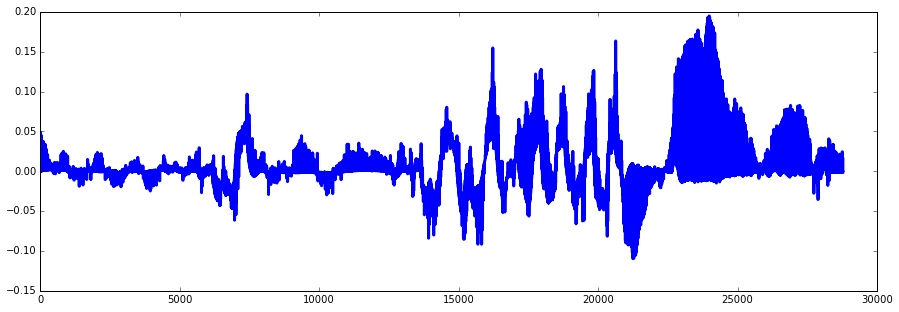

In [207]:
pl.plot(dx[pl.isfinite(dx)])

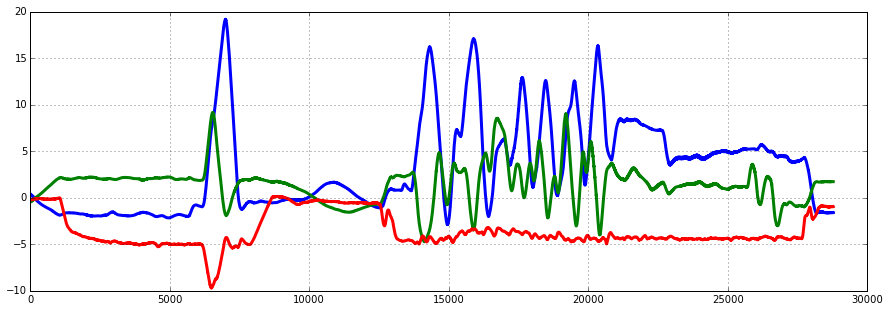

In [30]:
pl.plot(data.EST0_s0)
pl.plot(data.EST0_s1)
pl.plot(data.EST0_s2)
pl.grid()